
## Relationship between Home & Away Shots on Target per Goal vs Match Supremacy

Data: 'Football_Data_Combined.csv' preprocessed 152k matches UK and top European Leagues from the last 20 year. Source:  Football-Data.co.uk


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
pd.options.mode.chained_assignment = None
plt.style.use('ggplot')
%matplotlib inline

#### Read in prepared CSV file

In [3]:
df = pd.read_csv('C:\\Users\\MikeD\\Documents\\Betting\\Football-Data-Combined\\Leagues_Data_Combined.csv', index_col=[0])


C:\Users\MikeD\AppData\Local\Temp\ipykernel_18144\1175701433.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:\\Users\\MikeD\\Documents\\Betting\\Football-Data-Combined\\Leagues_Data_Combined.csv', index_col=[0])


In [4]:
df

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,Referee,HTHG,HTAG,HST,...,TR,HW_%,X_%,AW_%,Ov2.5_%,Un2.5_%,Exp,HG_Exp,AG_Exp,Sup Exp
0,I1,13/08/2022,Milan,Udinese,4.0,2.0,NaN,2.0,2.0,5.0,...,0.0,0.68,0.20,0.12,0.55,0.45,2.89,2.25,0.64,1.61
1,I1,13/08/2022,Sampdoria,Atalanta,0.0,2.0,NaN,0.0,1.0,1.0,...,0.0,0.21,0.24,0.54,0.56,0.44,2.94,0.97,1.94,-0.97
2,I1,13/08/2022,Lecce,Inter,1.0,2.0,NaN,0.0,1.0,4.0,...,0.0,0.09,0.17,0.74,0.60,0.40,3.10,0.54,2.56,-2.02
3,I1,13/08/2022,Monza,Torino,1.0,2.0,NaN,0.0,1.0,4.0,...,0.0,0.37,0.29,0.34,0.46,0.54,2.53,1.30,1.23,0.07
4,I1,14/08/2022,Fiorentina,Cremonese,3.0,2.0,NaN,2.0,1.0,11.0,...,1.0,0.69,0.19,0.12,0.58,0.42,3.03,2.38,0.65,1.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152585,E4,03/05/2003,Macclesfield,Rochdale,3.0,2.0,K Hill,0.0,1.0,3.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152586,E4,03/05/2003,Oxford,York,2.0,0.0,C Penton,1.0,0.0,4.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152587,E4,03/05/2003,Rushden & D,Hartlepool,1.0,1.0,L Cable,1.0,0.0,6.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152588,E4,03/05/2003,Shrewsbury,Scunthorpe,1.0,2.0,S Tomlin,1.0,0.0,5.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'Referee',
       'HTHG', 'HTAG', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR',
       'AR', 'TG', 'TST', 'TF', 'TC', 'TY', 'TR', 'HW_%', 'X_%', 'AW_%',
       'Ov2.5_%', 'Un2.5_%', 'Exp', 'HG_Exp', 'AG_Exp', 'Sup Exp'],
      dtype='object')

#### Isolate required columns

In [6]:
df=df[['FTHG','FTAG','HST', 'AST', 'TG', 'TST', 'HG_Exp', 'AG_Exp', 'Sup Exp']]
df

,FTHG,FTAG,HST,AST,TG,TST,HG_Exp,AG_Exp,Sup Exp
0,4.0,2.0,5.0,4.0,6.0,9.0,2.25,0.64,1.61
1,0.0,2.0,1.0,3.0,2.0,4.0,0.97,1.94,-0.97
2,1.0,2.0,4.0,9.0,3.0,13.0,0.54,2.56,-2.02
3,1.0,2.0,4.0,6.0,3.0,10.0,1.30,1.23,0.07
4,3.0,2.0,11.0,4.0,5.0,15.0,2.38,0.65,1.73
...,...,...,...,...,...,...,...,...,...
152585,3.0,2.0,3.0,3.0,5.0,6.0,NaN,NaN,NaN
152586,2.0,0.0,4.0,3.0,2.0,7.0,NaN,NaN,NaN
152587,1.0,1.0,6.0,10.0,2.0,16.0,NaN,NaN,NaN
152588,1.0,2.0,5.0,4.0,3.0,9.0,NaN,NaN,NaN


In [7]:
# number of null values
df.isna().sum()

FTHG        3891
FTAG        3891
HST        59437
AST        59434
TG          3891
TST        59437
HG_Exp     23533
AG_Exp     23533
Sup Exp    23533
dtype: int64

In [8]:
# remove rows with null values
df.dropna(inplace=True)

In [9]:
df.isna().sum()

FTHG       0
FTAG       0
HST        0
AST        0
TG         0
TST        0
HG_Exp     0
AG_Exp     0
Sup Exp    0
dtype: int64

In [10]:
df.describe()

,FTHG,FTAG,HST,AST,TG,TST,HG_Exp,AG_Exp,Sup Exp
count,86641.000000,86641.000000,86641.00000,86641.000000,86641.000000,86641.000000,86641.000000,86641.000000,86641.000000
mean,1.463106,1.160109,5.02605,4.105585,2.623215,9.131635,1.504156,1.140908,0.363248
std,1.238914,1.118153,2.72085,2.417322,1.630060,3.623637,0.448901,0.393983,0.795669
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.220000,0.240000,-3.160000
25%,1.000000,0.000000,3.00000,2.000000,1.000000,7.000000,1.230000,0.900000,-0.050000
50%,1.000000,1.000000,5.00000,4.000000,2.000000,9.000000,1.440000,1.090000,0.350000
75%,2.000000,2.000000,7.00000,5.000000,4.000000,11.000000,1.710000,1.310000,0.790000
max,10.000000,13.000000,24.00000,23.000000,13.000000,33.000000,3.570000,3.400000,3.320000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86641 entries, 0 to 150933
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   FTHG     86641 non-null  float64
 1   FTAG     86641 non-null  float64
 2   HST      86641 non-null  float64
 3   AST      86641 non-null  float64
 4   TG       86641 non-null  float64
 5   TST      86641 non-null  float64
 6   HG_Exp   86641 non-null  float64
 7   AG_Exp   86641 non-null  float64
 8   Sup Exp  86641 non-null  float64
dtypes: float64(9)
memory usage: 6.6 MB


#### Column data distribution 

In [12]:
# for i in df.columns:
#     plt.figure(figsize=(10,7))
#     sns.histplot(data=df[i],kde=True,multiple='stack')
#     plt.xticks(rotation=90)
#     plt.show()

##### Distribution of Supremacy - Boxplot

<AxesSubplot:ylabel='Sup Exp'>

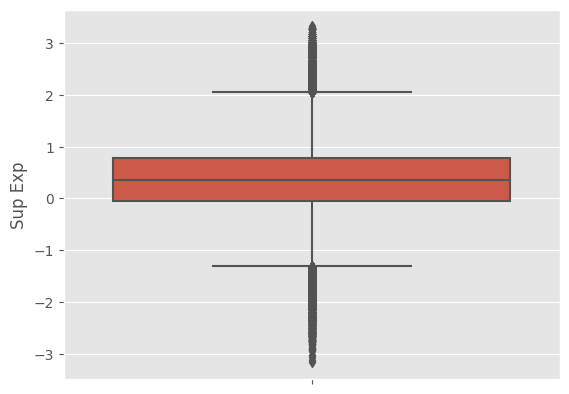

In [13]:
# Box plot of supremacy
sns.boxplot(y=df['Sup Exp'])

##### Distribution of Supremacy - KDE

<AxesSubplot:xlabel='Sup Exp', ylabel='Density'>

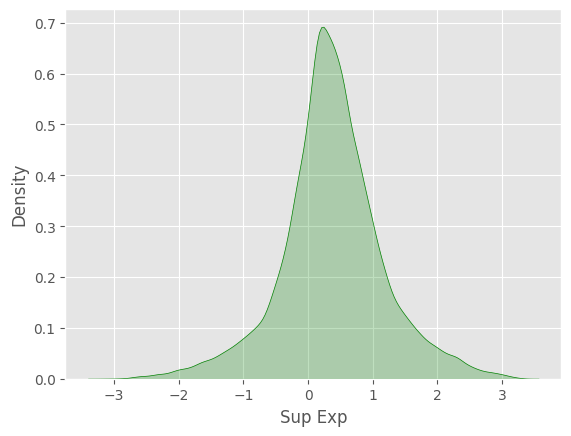

In [14]:
# KDE distribution of supremacy
sns.kdeplot(data=df['Sup Exp'],fill=True, color='Green')

##### Distribution of Total Shots on Goal - KDE

<AxesSubplot:xlabel='TST', ylabel='Density'>

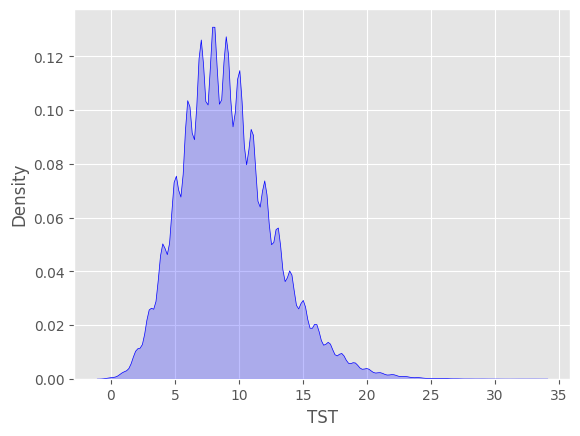

In [15]:
# KDE distribution of TST
sns.kdeplot(data=df['TST'],fill=True, color='Blue')

##### Distributions of Home/Away Goal Expectations - KDE

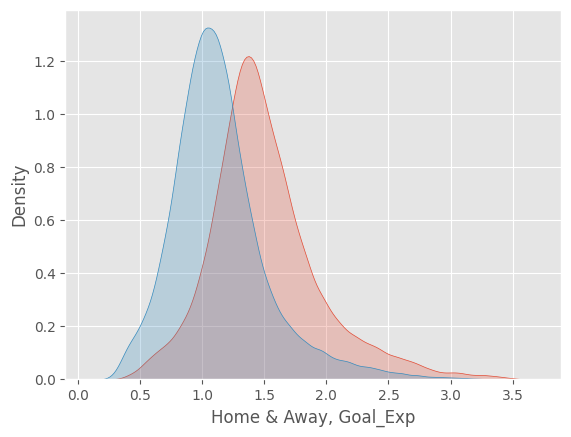

In [17]:
# KDE distribution of HG_Exp & AG_Exp merged
HGX_AGX = df[['HG_Exp','AG_Exp']]
for cols in HGX_AGX:
    sns.kdeplot(HGX_AGX[cols], fill=True)
    plt.xlabel('Home & Away, Goal_Exp')

In [18]:
# add columns
df['HST/H_Goal'] = round(df['HST'] / df['FTHG'],2)
df['AST/A_Goal'] = round(df['AST'] / df['FTAG'],2)

In [19]:
df.head()

,FTHG,FTAG,HST,AST,TG,TST,HG_Exp,AG_Exp,Sup Exp,HST/H_Goal,AST/A_Goal
0,4.0,2.0,5.0,4.0,6.0,9.0,2.25,0.64,1.61,1.25,2.0
1,0.0,2.0,1.0,3.0,2.0,4.0,0.97,1.94,-0.97,inf,1.5
2,1.0,2.0,4.0,9.0,3.0,13.0,0.54,2.56,-2.02,4.00,4.5
3,1.0,2.0,4.0,6.0,3.0,10.0,1.30,1.23,0.07,4.00,3.0
4,3.0,2.0,11.0,4.0,5.0,15.0,2.38,0.65,1.73,3.67,2.0


In [20]:
# replace inf and NaN with 0 values 
df.replace([np.inf, -np.inf], 0, inplace=True)
df.replace([np.NaN], 0, inplace=True)


In [21]:
df.head(20)

,FTHG,FTAG,HST,AST,TG,TST,HG_Exp,AG_Exp,Sup Exp,HST/H_Goal,AST/A_Goal
0,4.0,2.0,5.0,4.0,6.0,9.0,2.25,0.64,1.61,1.25,2.0
1,0.0,2.0,1.0,3.0,2.0,4.0,0.97,1.94,-0.97,0.00,1.5
2,1.0,2.0,4.0,9.0,3.0,13.0,0.54,2.56,-2.02,4.00,4.5
3,1.0,2.0,4.0,6.0,3.0,10.0,1.30,1.23,0.07,4.00,3.0
4,3.0,2.0,11.0,4.0,5.0,15.0,2.38,0.65,1.73,3.67,2.0
5,2.0,1.0,6.0,3.0,3.0,9.0,2.15,0.85,1.30,3.00,3.0
6,0.0,1.0,2.0,5.0,1.0,7.0,0.72,2.12,-1.40,0.00,5.0
7,1.0,0.0,2.0,5.0,1.0,7.0,1.40,1.26,0.14,2.00,0.0
8,2.0,5.0,3.0,8.0,7.0,11.0,1.18,1.69,-0.51,1.50,1.6
9,3.0,0.0,4.0,7.0,3.0,11.0,2.40,0.76,1.64,1.33,0.0


In [22]:
# new df with removed 0 values 
new_df = df[(df['HST/H_Goal'] != 0) & (df['AST/A_Goal'] != 0)]
new_df.reset_index(drop=True)

,FTHG,FTAG,HST,AST,TG,TST,HG_Exp,AG_Exp,Sup Exp,HST/H_Goal,AST/A_Goal
0,4.0,2.0,5.0,4.0,6.0,9.0,2.25,0.64,1.61,1.25,2.0
1,1.0,2.0,4.0,9.0,3.0,13.0,0.54,2.56,-2.02,4.00,4.5
2,1.0,2.0,4.0,6.0,3.0,10.0,1.30,1.23,0.07,4.00,3.0
3,3.0,2.0,11.0,4.0,5.0,15.0,2.38,0.65,1.73,3.67,2.0
4,2.0,1.0,6.0,3.0,3.0,9.0,2.15,0.85,1.30,3.00,3.0
...,...,...,...,...,...,...,...,...,...,...,...
44493,1.0,1.0,6.0,2.0,2.0,8.0,1.61,0.95,0.66,6.00,2.0
44494,1.0,1.0,8.0,4.0,2.0,12.0,1.86,0.76,1.10,8.00,4.0
44495,2.0,2.0,3.0,4.0,4.0,7.0,1.44,1.09,0.35,1.50,2.0
44496,2.0,3.0,6.0,15.0,5.0,21.0,1.15,1.38,-0.23,3.00,5.0


##### new_df stats summary - all occurrences with nil within the scoreline removed 

In [23]:
new_df.describe()

,FTHG,FTAG,HST,AST,TG,TST,HG_Exp,AG_Exp,Sup Exp,HST/H_Goal,AST/A_Goal
count,44498.000000,44498.000000,44498.000000,44498.000000,44498.000000,44498.000000,44498.000000,44498.000000,44498.000000,44498.000000,44498.000000
mean,1.883613,1.692795,5.427435,4.653423,3.576408,10.080858,1.502466,1.156561,0.345905,3.399140,3.168766
std,1.036388,0.913482,2.596283,2.315552,1.370314,3.499412,0.438285,0.390862,0.780931,2.030573,1.857624
min,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,0.250000,0.240000,-2.940000,0.330000,0.250000
25%,1.000000,1.000000,4.000000,3.000000,3.000000,8.000000,1.230000,0.910000,-0.060000,2.000000,2.000000
50%,2.000000,1.000000,5.000000,4.000000,3.000000,10.000000,1.440000,1.100000,0.330000,3.000000,3.000000
75%,2.000000,2.000000,7.000000,6.000000,4.000000,12.000000,1.710000,1.330000,0.770000,4.000000,4.000000
max,9.000000,8.000000,24.000000,22.000000,12.000000,30.000000,3.550000,3.360000,3.280000,21.000000,18.000000


#### Scatter Plot of the new_df (non-nil data) - HST/H Goal vs Sup Exp

<AxesSubplot:xlabel='Sup Exp', ylabel='HST/H_Goal'>

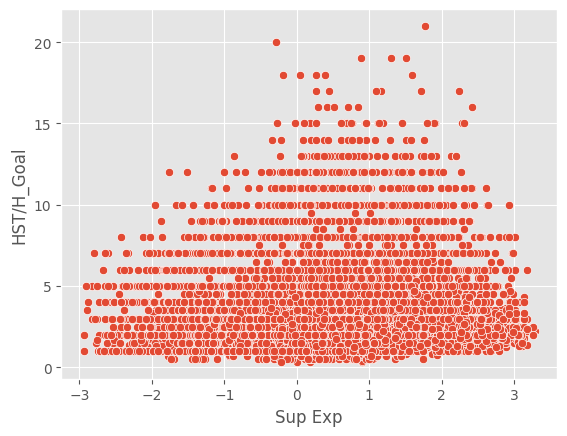

In [25]:
sns.scatterplot(data=new_df, x='Sup Exp', y='HST/H_Goal')

#### Scatter Plot of the new_df (non-nil data) - AST/A Goal vs Sup Exp

<AxesSubplot:xlabel='Sup Exp', ylabel='AST/A_Goal'>

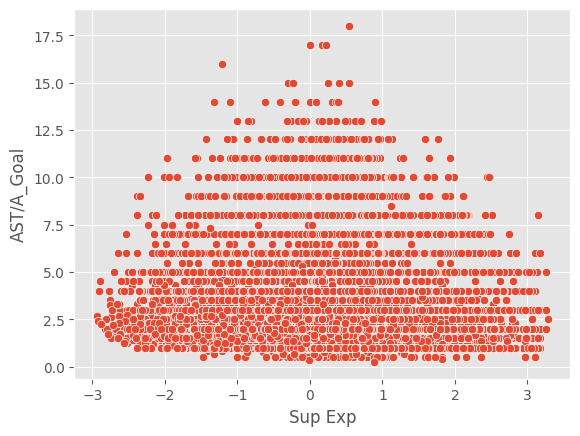

In [26]:
sns.scatterplot(data=new_df, x='Sup Exp', y='AST/A_Goal')

##### Scatter Plot with linear regression line comparing HST/H_Gl vs Supremacy

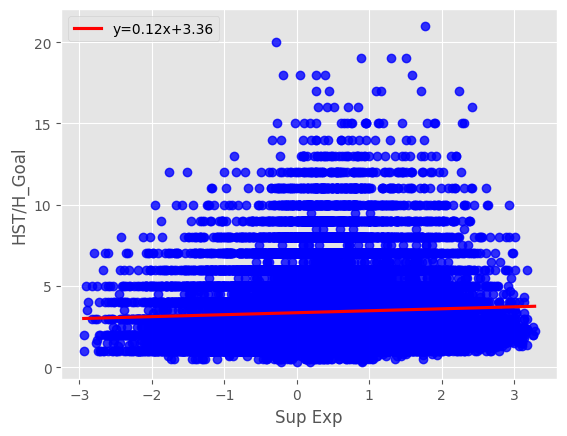

In [33]:

from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(new_df['Sup Exp'],new_df['HST/H_Goal'])

# use line_kws to set line label for legend
ax = sns.regplot(x='Sup Exp', y='HST/H_Goal', data=new_df, color='blue', 
 line_kws={'label':"y={0:.2f}x+{1:.2f}".format(slope,intercept),'color':'red'})

# plot legend
ax.legend()

plt.show()

##### Scatter Plot with linear regression line comparing AST/A_Gl vs Supremacy

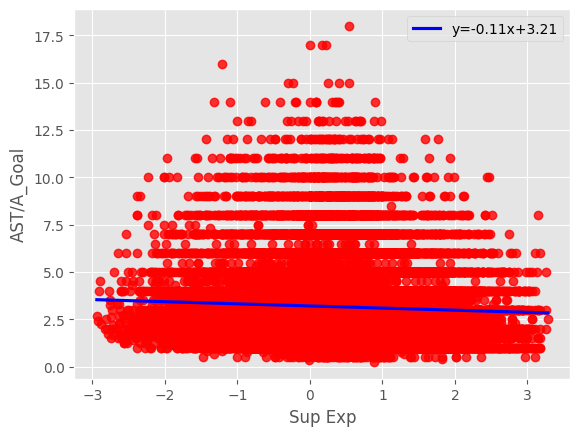

In [34]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(new_df['Sup Exp'],new_df['AST/A_Goal'])

# use line_kws to set line label for legend
ax = sns.regplot(x='Sup Exp', y='AST/A_Goal', data=new_df, color='red', 
 line_kws={'label':"y={0:.2f}x+{1:.2f}".format(slope,intercept),'color':'blue'})

# plot legend
ax.legend()

plt.show()

#### Get the applicable Global SOT stats

In [22]:

Global_Mean_H_SOT_per_HG = df['HST'].mean() / df['FTHG'].mean()
Global_Mean_A_SOT_per_AG = df['AST'].mean() / df['FTAG'].mean()

print('Global Mean SOT per Home team = ', df['HST'].mean())
print('Global Mean SOT per Away team = ', df['AST'].mean())
print('Global Mean Goals per Home team = ', df['FTHG'].mean())
print('Global Mean Goals per Away team = ', df['FTAG'].mean())
print('Global Mean H_SOT/H_Goal = ', Global_Mean_H_SOT_per_HG)
print('Global Mean A_SOT/A_Goal = ', Global_Mean_A_SOT_per_AG)

Global Mean SOT per Home team =  5.0260500225066655
Global Mean SOT per Away team =  4.105585115591925
Global Mean Goals per Home team =  1.463106381505292
Global Mean Goals per Away team =  1.1601089553444675
Global Mean H_SOT/H_Goal =  3.435191101644776
Global Mean A_SOT/A_Goal =  3.5389651089908765


#### Get similar new_df SOT stats

In [36]:
# Get applicable parameters for new df
new_df_H_SOT_per_HG = new_df['HST'].mean() / new_df['FTHG'].mean()
new_df_A_SOT_per_AG = new_df['AST'].mean() / new_df['FTAG'].mean()

print('new df Mean SOT per Home team = ', new_df['HST'].mean())
print('new df Mean SOT per Away team = ', new_df['AST'].mean())
print('new df Mean Goals per Home team = ', new_df['FTHG'].mean())
print('new df Mean Goals per Away team = ', new_df['FTAG'].mean())
print('new df Mean H_SOT/H_Goal = ', new_df_H_SOT_per_HG)
print('new df Mean A_SOT/A_Goal = ', new_df_A_SOT_per_AG)

new df Mean SOT per Home team =  5.42743494089622
new df Mean SOT per Away team =  4.653422625735988
new df Mean Goals per Home team =  1.8836127466402985
new df Mean Goals per Away team =  1.692795181805924
new df Mean H_SOT/H_Goal =  2.881396375436964
new df Mean A_SOT/A_Goal =  2.7489578631548204


By removing all 0 values we've removed all low scoring/shots matches so new df data is heavily skewed

#### Bin the supremacies to see the relationship better

In [37]:
bin_width = 0.10
num_bins = 44
min_value = -2.2
max_value = 2.2

bins = np.arange(min_value, max_value + bin_width, bin_width)
midpoints = (bins[:-1] + bins[1:]) / 2
labels = [f'{x:.1f}' for x in midpoints]

new_df['Sup_Bin'] = pd.cut(new_df['Sup Exp'], bins=bins, labels=labels, right=False)
new_df.reset_index(drop=True)


,FTHG,FTAG,HST,AST,TG,TST,HG_Exp,AG_Exp,Sup Exp,HST/H_Goal,AST/A_Goal,Sup_Bin
0,4.0,2.0,5.0,4.0,6.0,9.0,2.25,0.64,1.61,1.25,2.0,1.7
1,1.0,2.0,4.0,9.0,3.0,13.0,0.54,2.56,-2.02,4.00,4.5,-2.0
2,1.0,2.0,4.0,6.0,3.0,10.0,1.30,1.23,0.07,4.00,3.0,0.1
3,3.0,2.0,11.0,4.0,5.0,15.0,2.38,0.65,1.73,3.67,2.0,1.8
4,2.0,1.0,6.0,3.0,3.0,9.0,2.15,0.85,1.30,3.00,3.0,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...
44493,1.0,1.0,6.0,2.0,2.0,8.0,1.61,0.95,0.66,6.00,2.0,0.7
44494,1.0,1.0,8.0,4.0,2.0,12.0,1.86,0.76,1.10,8.00,4.0,1.1
44495,2.0,2.0,3.0,4.0,4.0,7.0,1.44,1.09,0.35,1.50,2.0,0.4
44496,2.0,3.0,6.0,15.0,5.0,21.0,1.15,1.38,-0.23,3.00,5.0,-0.2


#### How is the binned data distributed by Sup?

In [38]:
new_df['Sup_Bin'].value_counts()

0.2     3235
0.3     3056
0.4     3014
0.5     2794
0.6     2618
0.1     2454
-0.0    2287
0.7     2180
0.8     2015
-0.1    1828
0.9     1699
1.0     1501
-0.2    1480
1.1     1259
-0.3    1194
1.2     1011
-0.4     944
-0.5     808
1.3      802
1.4      649
-0.6     590
1.5      519
-0.7     485
-0.8     483
1.6      477
1.7      416
1.8      383
-0.9     373
-1.0     348
-1.1     312
1.9      280
2.0      280
-1.2     251
2.1      222
-1.3     220
2.2      189
-1.4     189
-1.5     166
-1.6     139
-1.7     120
-1.9      97
-1.8      92
-2.0      74
-2.2      51
Name: Sup_Bin, dtype: int64

#### Visualize frequencies of binned Sups

<AxesSubplot:>

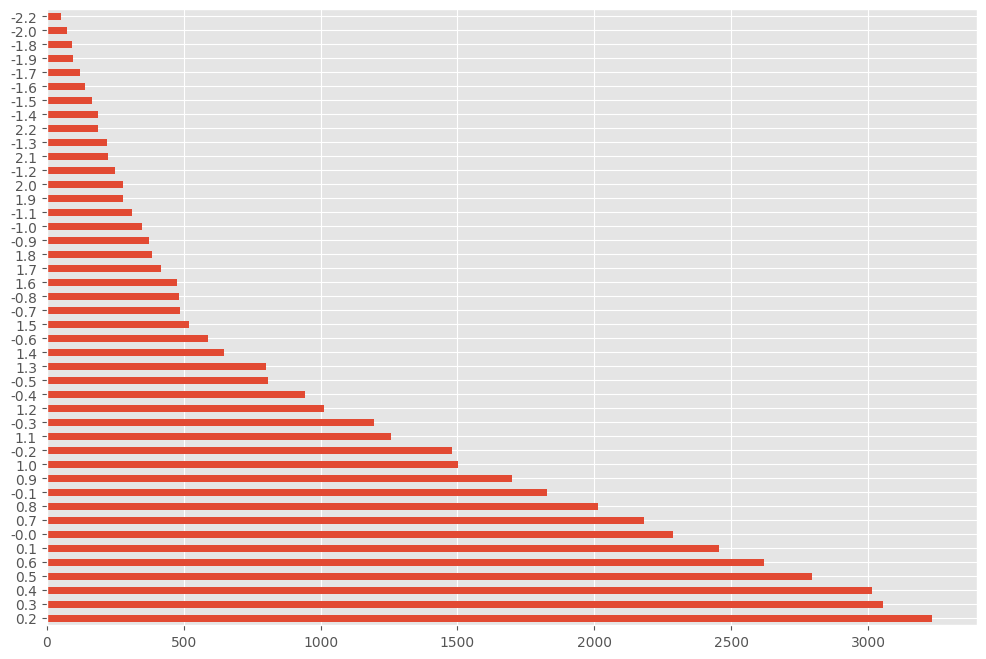

In [39]:
new_df['Sup_Bin'].value_counts().plot(kind='barh',figsize=(12,8))

Significantly less binned data for extreme Sups and especially for negative extreme Sups

In [40]:
#drop NaN value where Sup > max limit or < min limit
new_df.dropna(inplace=True)
new_df.reset_index(drop=True)

,FTHG,FTAG,HST,AST,TG,TST,HG_Exp,AG_Exp,Sup Exp,HST/H_Goal,AST/A_Goal,Sup_Bin
0,4.0,2.0,5.0,4.0,6.0,9.0,2.25,0.64,1.61,1.25,2.0,1.7
1,1.0,2.0,4.0,9.0,3.0,13.0,0.54,2.56,-2.02,4.00,4.5,-2.0
2,1.0,2.0,4.0,6.0,3.0,10.0,1.30,1.23,0.07,4.00,3.0,0.1
3,3.0,2.0,11.0,4.0,5.0,15.0,2.38,0.65,1.73,3.67,2.0,1.8
4,2.0,1.0,6.0,3.0,3.0,9.0,2.15,0.85,1.30,3.00,3.0,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...
43579,1.0,1.0,6.0,2.0,2.0,8.0,1.61,0.95,0.66,6.00,2.0,0.7
43580,1.0,1.0,8.0,4.0,2.0,12.0,1.86,0.76,1.10,8.00,4.0,1.1
43581,2.0,2.0,3.0,4.0,4.0,7.0,1.44,1.09,0.35,1.50,2.0,0.4
43582,2.0,3.0,6.0,15.0,5.0,21.0,1.15,1.38,-0.23,3.00,5.0,-0.2


<AxesSubplot:xlabel='Sup_Bin', ylabel='HST/H_Goal'>

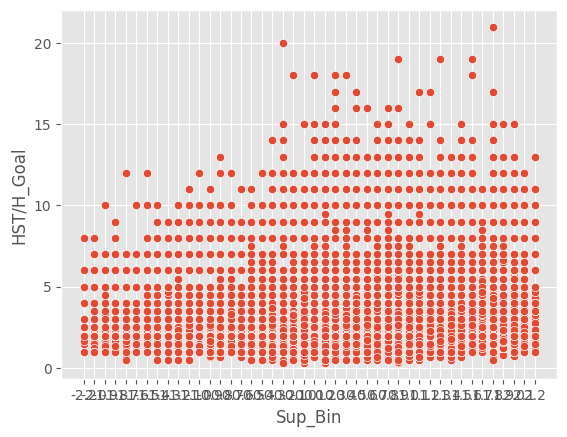

In [47]:
sns.scatterplot(data=new_df, x='Sup_Bin', y='HST/H_Goal')


In [48]:
new_df['Sup_Bin'] = new_df['Sup_Bin'].astype('float')

#### Group the data by bin to obtain bin means

In [49]:
# Grouping Average HST/H_Goal and AST/A_Goal by the binned Sups and plotting graph
grouped_data_h = new_df.groupby('Sup_Bin')['HST/H_Goal'].mean().reset_index()
grouped_data_a = new_df.groupby('Sup_Bin')['AST/A_Goal'].mean().reset_index()

In [50]:
grouped_data_h


,Sup_Bin,HST/H_Goal
0,-2.2,2.591569
1,-2.0,3.197027
2,-1.9,2.787113
3,-1.8,2.910326
4,-1.7,3.025750
5,-1.6,2.782230
6,-1.5,3.030602
7,-1.4,3.110582
8,-1.3,3.118182
9,-1.2,3.065339


In [51]:
grouped_data_h.describe()

,Sup_Bin,HST/H_Goal
count,44.000000,44.000000
mean,0.047727,3.295377
std,1.288498,0.245149
min,-2.200000,2.591569
25%,-1.025000,3.130294
50%,0.050000,3.401857
75%,1.125000,3.478656
max,2.200000,3.704974


#### Add the percentage difference of the grouped data to show how HST/H Goal varies from average given the supremacy

In [70]:
grouped_data_h['Pc_fr.Avg_H'] = grouped_data_h['HST/H_Goal'] / grouped_data_h['HST/H_Goal'].mean()
grouped_data_h


,Sup_Bin,HST/H_Goal,Pc_fr.Avg_H
0,-2.2,2.591569,0.786425
1,-2.0,3.197027,0.970155
2,-1.9,2.787113,0.845765
3,-1.8,2.910326,0.883154
4,-1.7,3.025750,0.918180
5,-1.6,2.782230,0.844283
6,-1.5,3.030602,0.919653
7,-1.4,3.110582,0.943923
8,-1.3,3.118182,0.946229
9,-1.2,3.065339,0.930194


In [53]:
grouped_data_a.describe()

,Sup_Bin,AST/A_Goal
count,44.000000,44.000000
mean,0.047727,3.173237
std,1.288498,0.173705
min,-2.200000,2.858739
25%,-1.025000,3.061565
50%,0.050000,3.185222
75%,1.125000,3.254968
max,2.200000,3.708976


In [54]:
grouped_data_a['Pc_fr.Avg_A'] = grouped_data_a['AST/A_Goal'] / grouped_data_a['AST/A_Goal'].mean()
grouped_data_a

,Sup_Bin,AST/A_Goal,Pc_fr.Avg_A
0,-2.2,3.536667,1.114529
1,-2.0,3.153243,0.993699
2,-1.9,3.231856,1.018473
3,-1.8,3.162283,0.996548
4,-1.7,3.031500,0.955333
5,-1.6,2.981871,0.939693
6,-1.5,3.708976,1.168830
7,-1.4,3.265661,1.029126
8,-1.3,3.223273,1.015768
9,-1.2,3.120279,0.983311


#### Plot the binned data with regression line

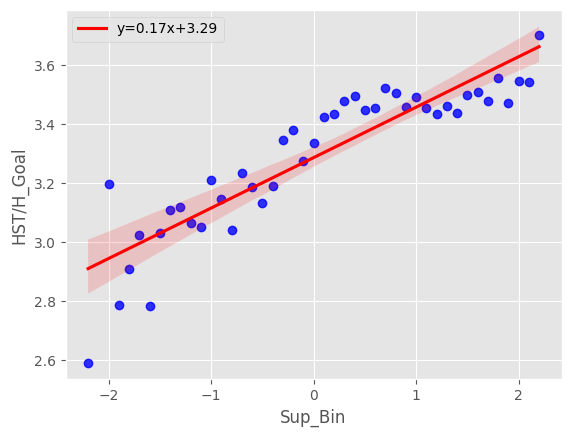

In [55]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(grouped_data_h['Sup_Bin'],grouped_data_h['HST/H_Goal'])

# use line_kws to set line label for legend
ax = sns.regplot(x='Sup_Bin', y='HST/H_Goal', data=grouped_data_h, color='blue', 
 line_kws={'label':"y={0:.2f}x+{1:.2f}".format(slope,intercept),'color':'red'})

# plot legend
ax.legend()

plt.show()

From above plot we can see polynomial would be a better fit - do transform

In [56]:
def PlotPolly(model, ind_var, dep_var, Name):
    x_new = np.linspace(-2.5,2.5,46)
    y_new = model(x_new)
    
    plt.plot(ind_var, dep_var, '.', x_new, y_new, '-')
    plt.title('Sup vs HST/H_Goal')
    ax = plt.gca()
    ax.set_facecolor((0.898,0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('HST/H_Goal')
    
    plt.show()
    plt.close()

In [57]:
x_h = grouped_data_h['Sup_Bin']
y_h = grouped_data_h['HST/H_Goal']

In [58]:
# declare poly degree
degree = 2

f_h = np.polyfit(x_h,y_h,degree)
p_h = np.poly1d(f_h)
print(p_h)

          2
-0.03751 x + 0.1742 x + 3.348


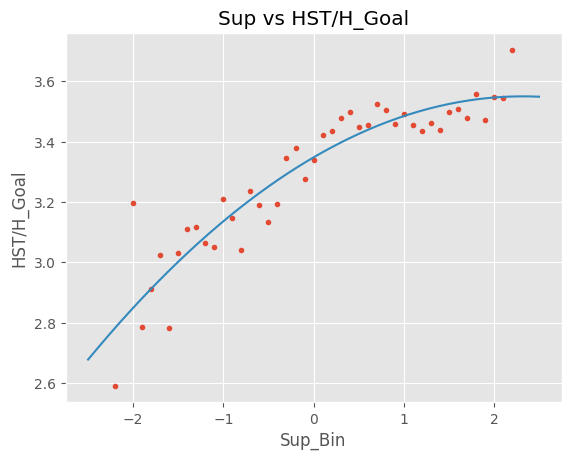

In [59]:
# lets visualize this by by parsing the 'PlotPolly' function 
PlotPolly(p_h,x_h,y_h,'Sup_Bin')

#### Same for Away

In [60]:
def PlotPolly(model, ind_var, dep_var, Name):
    x_new = np.linspace(-2.5,2.5,46)
    y_new = model(x_new)
    
    plt.plot(ind_var, dep_var, '.', x_new, y_new, '-')
    plt.title('Sup vs AST/A_Goal')
    ax = plt.gca()
    ax.set_facecolor((0.898,0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('AST/A_Goal')
    
    plt.show()
    plt.close()

In [61]:
x_a = grouped_data_a['Sup_Bin']
y_a = grouped_data_a['AST/A_Goal']

In [62]:
#declare poly degree
degree = 2

f_a = np.polyfit(x_a,y_a,degree)
p_a = np.poly1d(f_a)
print(p_a)

          2
-0.03189 x - 0.08445 x + 3.229


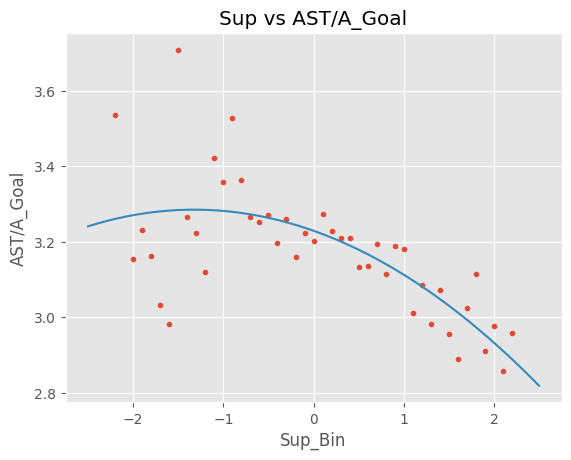

In [63]:
# lets visualize this by by parsing the 'PlotPolly' function 
PlotPolly(p_a,x_a,y_a,'Sup_Bin')

#### Pot the same graph but with y-axis set as Pc_difference from mean - so can be applied to any league with a projected mean which is different to global average

In [80]:
def PlotPolly(model, ind_var, dep_var, Name):
    x_new = np.linspace(-2.5,2.5,46)
    y_new = model(x_new)
    
    plt.plot(ind_var, dep_var, '.', x_new, y_new, '-')
    plt.title('Sup vs Pc_fr.Avg_H')
    ax = plt.gca()
    ax.set_facecolor((0.898,0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Pc_fr.Avg_H')
    
    plt.show()
    plt.close()

In [81]:
x_h2 = grouped_data_h['Sup_Bin']
y_h2 = grouped_data_h['Pc_fr.Avg_H']

In [82]:
#declare poly degree
degree = 2

f_h2 = np.polyfit(x_h2,y_h2,degree)
p_h2 = np.poly1d(f_h2)
print(p_h2)

          2
-0.01138 x + 0.05286 x + 1.016


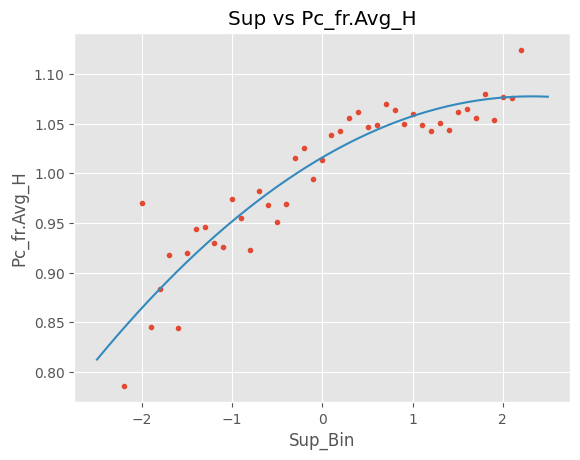

In [84]:
# lets visualize this by by parsing the 'PlotPolly' function 
PlotPolly(p_h2,x_h2,y_h2,'Sup_Bin')

In [85]:
def PlotPolly(model, ind_var, dep_var, Name):
    x_new = np.linspace(-2.5,2.5,46)
    y_new = model(x_new)
    
    plt.plot(ind_var, dep_var, '.', x_new, y_new, '-')
    plt.title('Sup vs Pc_Fr.Avg_A')
    ax = plt.gca()
    ax.set_facecolor((0.898,0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Pc_fr.Avg_A')
    
    plt.show()
    plt.close()

In [86]:
x_a2 = grouped_data_a['Sup_Bin']
y_a2 = grouped_data_a['Pc_fr.Avg_A']

In [87]:
#declare poly degree
degree = 2

f_a2 = np.polyfit(x_a2,y_a2,degree)
p_a2 = np.poly1d(f_a2)
print(p_a2)

          2
-0.01005 x - 0.02661 x + 1.018


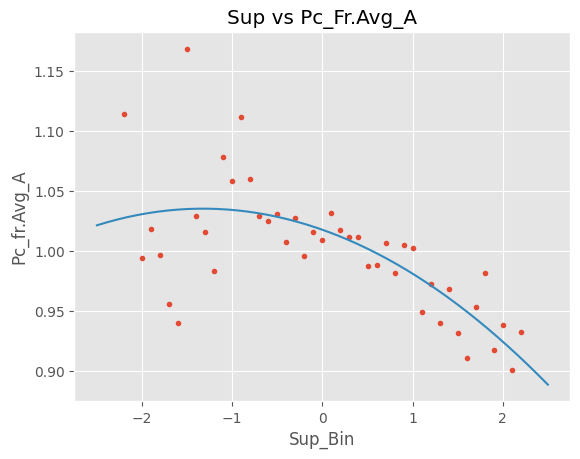

In [88]:
# lets visualize this by by parsing the 'PlotPolly' function 
PlotPolly(p_a2,x_a2,y_a2,'Sup_Bin')

#### Conclusion:
 - The rate of home shots on target per home goal increases non-linearly as match supremacy increases. So bigger favourites have more shots on target for every goal that is scored. This rate of change plateaus as the supremacy tends to approximately 2.0. This relationship can be summarized with the formula:
     
y = -0.011 x^2 + 0.053 x + 1.02     [y = percentage from average HST per home goal scored, x = match supremacy]

 - The rate of away shots on target per away goal has more variance up to a zero supremacy match and any observable trend is less defined. Above zero supremacy the trend reduces without any suggestion of a plateau being reached given the range that our data takes. This relationship of the can be best summarized with the formula:
          
y = -0.01 x^2 - 0.027 x + 1.02
      


### _________________________________________________________________________________________________